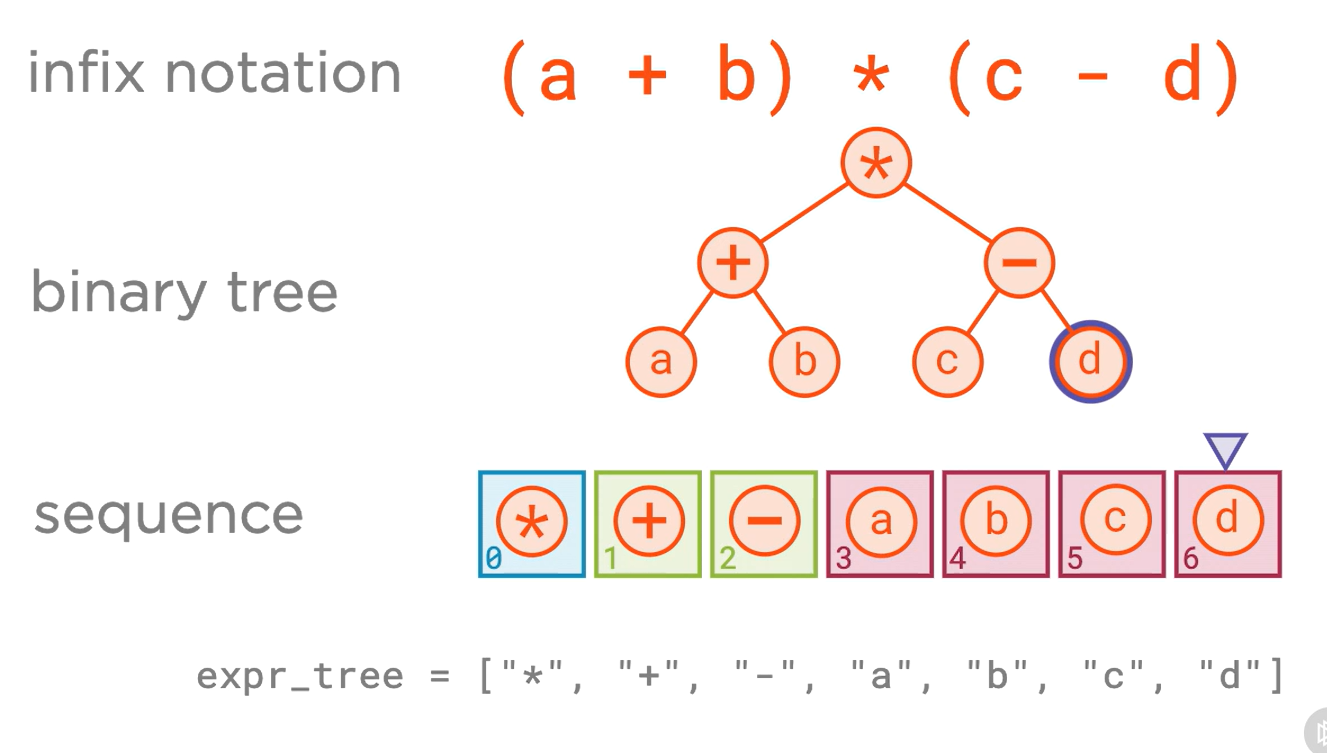

### Tree Traversals

In [1]:
a = 1
b = 2
c = 3
d = 4
infix_notation = (a + b) * (c - d)
expr_tree = ["*", "+", "-", "a", "b", "c", "d"]

In [2]:
iterator = iter(expr_tree)
iterator

In [3]:
next(iterator)

'*'

In [4]:
next(iterator)

'+'

In [5]:
next(iterator)

'-'

In [6]:
next(iterator)

'a'

In [7]:
next(iterator)

'b'

In [8]:
next(iterator)

'c'

In [9]:
next(iterator)

'd'

In [10]:
next(iterator)

StopIteration: 

In [11]:
iterator = iter(expr_tree)
for item in iterator:
    print(item)

*
+
-
a
b
c
d


## Breadth First Level Order Iterator

In [16]:
class LevelOrderIterator:
    def __init__(self,sequence):
        self._sequence = sequence
        self._index = 0
    
    def __next__(self):
        if self._index == len(self._sequence):
            raise StopIteration
        result = self._sequence[self._index]
        self._index += 1
        return result

    def __iter__(self):
        return self   


In [17]:
expr_tree = ["*", "+", "-", "a", "b", "c", "d"]
iterator = LevelOrderIterator(expr_tree)
for item in iterator:
    print(item)

*
+
-
a
b
c
d


In [18]:
# Test if our Iterator is working
iterator = LevelOrderIterator(expr_tree)
print(" ".join(iterator))

* + - a b c d


# Perfect Binary Tree
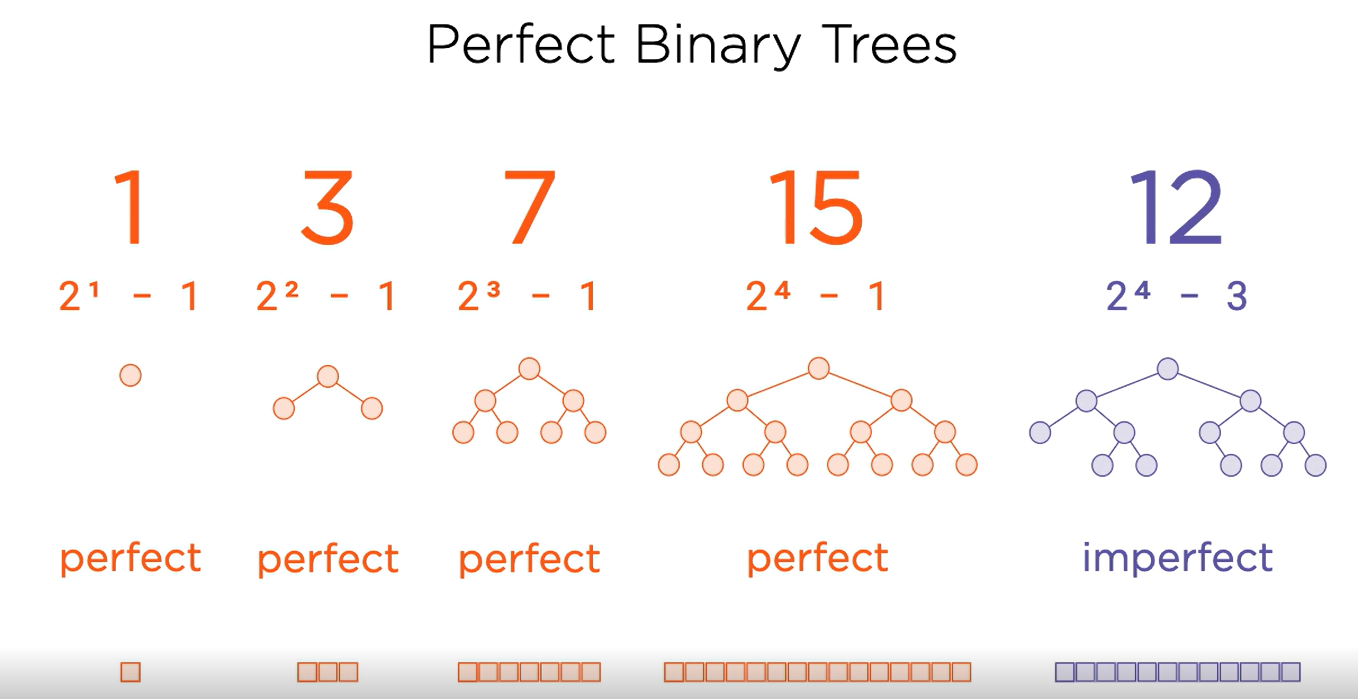

In [28]:
def _is_perfect_length(sequence):
    """ True if Sequence has length 2^n -1, otherwise false        
    """
    n = len(sequence)
    return ((n+1) & n==0) and (n!=0)
    
class LevelOrderIterator:
    def __init__(self,sequence):
        if not _is_perfect_length(sequence):
            raise ValueError(
                f"Sequence of length {len(sequence)} does not represent "
                "a perfect binary tree with length 2^n - 1"
            )
        self._sequence = sequence
        self._index = 0
    
    def __next__(self):
        if self._index == len(self._sequence):
            raise StopIteration
        result = self._sequence[self._index]
        self._index += 1
        return result

    def __iter__(self):
        return self   

In [29]:
# Demonstrate if _is_perfect_length is working
for i in range(0,32):
    print(["x"]*i)
{i: _is_perfect_length(sequence = ["x"]*i)for i in range(0,32)}

[]
['x']
['x', 'x']
['x', 'x', 'x']
['x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['x', 'x', 'x', 'x', 'x', 'x

{0: False,
 1: True,
 2: False,
 3: True,
 4: False,
 5: False,
 6: False,
 7: True,
 8: False,
 9: False,
 10: False,
 11: False,
 12: False,
 13: False,
 14: False,
 15: True,
 16: False,
 17: False,
 18: False,
 19: False,
 20: False,
 21: False,
 22: False,
 23: False,
 24: False,
 25: False,
 26: False,
 27: False,
 28: False,
 29: False,
 30: False,
 31: True}

In [30]:
non_tree = "+ 24 12 -".split()
iterator = LevelOrderIterator(non_tree)

ValueError: Sequence of length 4 does not represent a perfect binary tree with length 2^n - 1

## Depth First PreOrder Iterator

In [35]:
def _left_child(index): # Here index is parent
    return 2 * index + 1

def _right_child(index):
    return 2*index + 2

class PreOrderIterator:
    def __init__(self,sequence):
        if not _is_perfect_length(sequence):
            raise ValueError(
                f"Sequence of length {len(sequence)} does not represent "
                "a perfect binary tree with length 2^n - 1"
            )
        self._sequence = sequence
        self._stack = [0]
    def __next__(self):
        if len(self._stack) == 0:
            raise StopIteration
        index = self._stack.pop()
        result = self._sequence[index]
        # Pre-order: Push right child first so left child is popped out first and then processed first. LIFO(Last in First Out)
        right_child_index = _right_child(index)
        if right_child_index < len(self._sequence):
            self._stack.append(right_child_index)

        left_child_index = _left_child(index)
        if left_child_index < len(self._sequence):
            self._stack.append(left_child_index)

        return result

    def __iter__(self):
        return self
        
        
        

In [36]:
expr_tree = "* + - a b c d".split()
iterator = PreOrderIterator(expr_tree)
" ".join(iterator)

'* + a b - c d'

In [40]:
# Example of POP functionality 
# If you call list_name.pop(), it removes and returns the last element from the list.
my_list = [1, 2, 3, 4, 5, 6]
popped_item = my_list.pop(3)
print("New list:", my_list)  # Output: [1, 2, 3, 5, 6]
print("Popped Item:", popped_item)  # Output: 4

New list: [1, 2, 3, 5, 6]
Popped Item: 4


## Depth First inorder Traversal

In [48]:
def _left_child(index): # Here index is parent
    return 2 * index + 1

def _right_child(index):
    return 2*index + 2

class InOrderIterator:
    def __init__(self,sequence):
        if not _is_perfect_length(sequence):
            raise ValueError(
                f"Sequence of length {len(sequence)} does not represent "
                "a perfect binary tree with length 2^n - 1"
            )
        self._sequence = sequence
        self._stack = []
        self._index = 0

    def __next__(self):
        if (len(self._stack) == 0) and (self._index >= len(self._sequence)):
            raise StopIteration
        # Push left children onto the stack while possible
        while self._index < len(self._sequence):
            self._stack.append(self._index)
            self._index = _left_child(self._index)
        # Pop from the stack and process, before moving to the right child
        index = self._stack.pop()
        result = self._sequence[index]
        self._index = _right_child(index)
        return result

    def __iter__(self):
        return self
    


In [49]:
expr_tree = "* + - a b c d".split()
iterator = InOrderIterator(expr_tree)
" ".join(iterator)

'a + b * c - d'